# AICE Associate 연습문제 1

# 호텔 예약 취소 여부 예측

호텔 예약 데이터를 읽어들여 데이터를 분석 및 전처리한 후 머신러닝과 딥러닝으로 호텔 예약 취소 여부를 예측하고 결과를 분석하세요.

1. pandas 라이브러리를 별칭 pd로 임포트하는 코드를 작성하고 실행하시오. 설치되어 있지 않으면 설치해서 임포트 하시오.

In [1]:
# 여기에 답안코드를 작성하세요.
import pandas as pd

2. 모델링을 위해 분석 및 처리할 데이터 파일을 읽어오려고 합니다.
pandas 함수로 데이터 파일을 읽고 데이터프레임 변수명 original_df 할당하는 코드를 작성하세요.

- hotel_bookings.csv 파일을 읽어 original_df 할당하세요.
- df에 original_df 를 복사하세요.
- arrival_date 컬럼을 arrival_date_Year, arrival_date_Month, arrival_date_Day_of_month로 각각 분리하여 df에 저장하세요.
- df에서 arrival_date 컬럼을 삭제하세요.

In [3]:
# 여기에 답안코드를 작성하세요.
df_original = pd.read_csv("hotel_bookings.csv")
df = df_original.copy()

df['arrival_date_Year'] = df['arrival_date'].str.split('-').str[0]
df['arrival_date_Month'] = df['arrival_date'].str.split('-').str[1]
df['arrival_date_Day_of_month'] = df['arrival_date'].str.split('-').str[2]

df.drop('arrival_date', axis=1, inplace=True)
df

Unnamed: 0         hotel  is_canceled  lead_time  \
0                0  Resort Hotel            0        342   
1                1  Resort Hotel            0        737   
2                2  Resort Hotel            0          7   
3                3  Resort Hotel            0         13   
4                4  Resort Hotel            0         14   
...            ...           ...          ...        ...   
119385      119385    City Hotel            0         23   
119386      119386    City Hotel            0        102   
119387      119387    City Hotel            0         34   
119388      119388    City Hotel            0        109   
119389      119389    City Hotel            0        205   

        arrival_date_week_number  stays_in_weekend_nights  \
0                             27                        0   
1                             27                        0   
2                             27                        0   
3                             27                        0   
4                             27                        0   
...                          ...                      ...   
119385                        35                        2   
119386                        35                        2   
119387                        35                        2   
119388                        35                        2   
119389                        35                        2   

        stays_in_week_nights  adults  children  babies  ...  \
0                          0       2       0.0       0  ...   
1                          0       2       0.0       0  ...   
2                          1       1       0.0       0  ...   
3                          1       1       0.0       0  ...   
4                          2       2       0.0       0  ...   
...                      ...     ...       ...     ...  ...   
119385                     5       2       0.0       0  ...   
119386                     5       3       0.0       0  ...   
119387                     5       2       0.0       0  ...   
119388                     5       2       0.0       0  ...   
119389                     7       2       0.0       0  ...   

       days_in_waiting_list customer_type     adr required_car_parking_spaces  \
0                         0     Transient    0.00                           0   
1                         0     Transient    0.00                           0   
2                         0     Transient   75.00                           0   
3                         0     Transient   75.00                           0   
4                         0     Transient   98.00                           0   
...                     ...           ...     ...                         ...   
119385                    0     Transient   96.14                           0   
119386                    0     Transient  225.43                           0   
119387                    0     Transient  157.71                           0   
119388                    0     Transient  104.40                           0   
119389                    0     Transient  151.20                           0   

        total_of_special_requests  reservation_status  \
0                               0           Check-Out   
1                               0           Check-Out   
2                               0           Check-Out   
3                               0           Check-Out   
4                               1           Check-Out   
...                           ...                 ...   
119385                          0           Check-Out   
119386                          2           Check-Out   
119387                          4           Check-Out   
119388                          0           Check-Out   
119389                          2           Check-Out   

        reservation_status_date arrival_date_Year arrival_date_Month  \
0                    2015-07-01              2015               Jul

다음 문항을 풀기 전에 아래의 코드를 실행하세요.

In [4]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc("font", family="NanumGothicCoding")

3. "arrival_date_Year"의 분포도를 알아보려고 합니다.

- seaborn을 사용하세요

출력된 그래프를 보고 해석한 것으로 옳은 선택지를 아래에서 골라 "답안03" 변수에 저장하세요(예: 답안03=1)

1. countplot 그래프에서 "arrival_date_Year"의 분포를 확인 시 50000개가 넘는 해가 있다.
2. "arrival_date_Year"의 분포에서 2015가 2017보다 크다.
3. 총 개수가 3000 미만인 연도가 1개 있다.

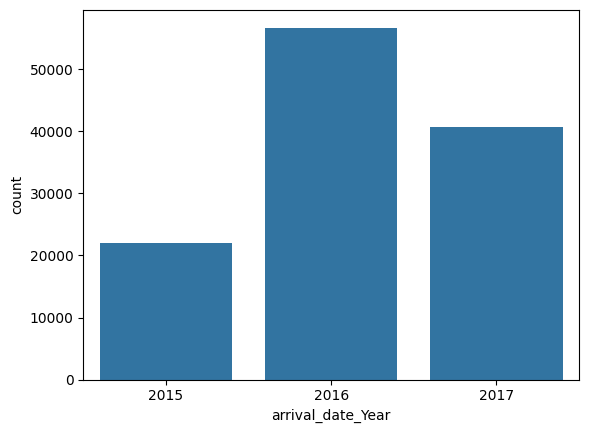

In [5]:
# 여기에 답안코드를 작성하세요.
import seaborn as sns

sns.countplot(data=df, x='arrival_date_Year')

답안03 = 1

4. children과 babies에 대한 관계를 알아보려고 합니다.


- seaborn을 사용하세요.
- children과 babies에 대해 jointplot그래프를 그리세요.
    - x축은 children, y축은 babies를 표시하세요


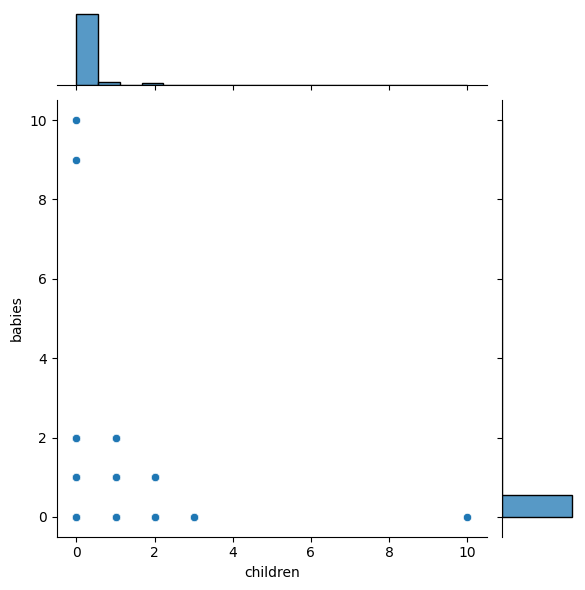

In [6]:
# 여기에 답안코드를 작성하세요.
sns.jointplot(x=df['children'], y=df['babies'])


5. 모델링 성능을 제대로 얻기 위해서 결측치 처리는 필수입니다.
 아래 가이드를 따라 결측치를 처리 하세요.

 - 대상 데이터프레임: df
 - 결측치를 확인하는 코드를 작성하세요.
 - company 컬럼은 삭제합니다.
 - 결측치가 있는 행(raw)을 삭제 하세요.
 - 전처리 반영된 결과를 새로운 데이터프레임 변수명  df_na 에 저장하세요.
 - company를 제외한 결측치 개수를 "답안05" 변수에 저장하세요.

In [7]:
# 여기에 답안코드를 작성하세요.
print(df.isnull().sum())

df_na = df.drop("company", axis=1)
답안05 = df_na.isnull().sum().sum()

df_na.dropna(inplace=True)



Unnamed: 0                             0
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_week_number               0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

6. 모델링 성능을 제대로 얻기 위해서 불필요한 변수는 삭제해야 합니다.
 아래 가이드를 따라 불필요 데이터를 삭제 처리 하세요.

 - 대상 데이터프레임: df_na
 - "Unnamed: 0", "reservation_status", "reservation_status_date" 3개 컬럼을 삭제하세요.
 - 전처리 반영된 결과를 새로운 데이터프레임 변수명 df_del에 저장하세요.

In [8]:
# 여기에 답안코드를 작성하세요.
df_del = df_na.drop(["Unnamed: 0", "reservation_status", "reservation_status_date" ], axis=1)

7. hotel "City Hotel"에 한정하여 상관관계를 분석하세요.
is_canceled와 가장 상관관계가 큰 변수 이름을 답안07에 작성하세요.

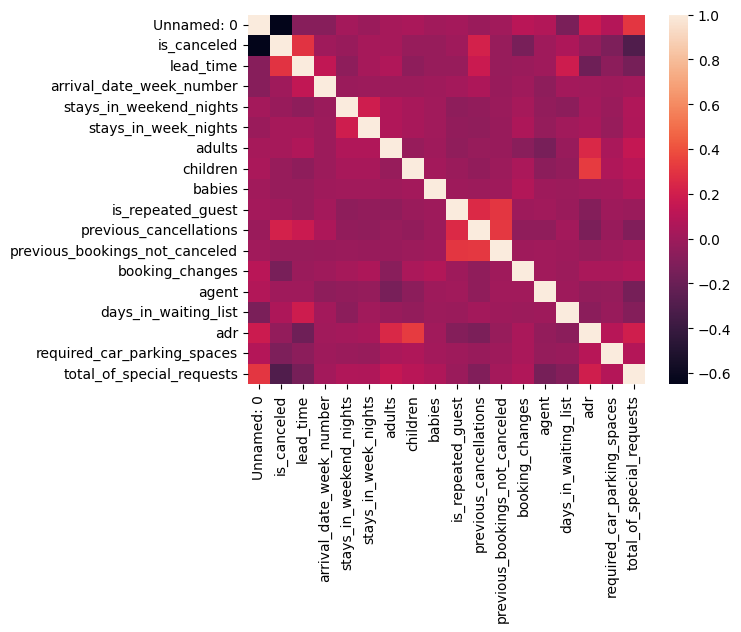

In [14]:
# 여기에 답안코드를 작성하세요.
sns.heatmap((df_del[df_del["hotel"] == "City Hotel"]).corr(), annot=True)
plt.show()

답안07 = 'total_of_special_requests'

8. 원-핫 인코딩(One-hot encoding)은 범주형 변수를 1과 0의 이진형 벡터로 변환하기 위하여 사용하는 방법입니다.

원-핫 인코딩으로 아래 조건에 해당하는 컬럼 데이터를 변환하세요.

 - 대상 데이터프레임: df_del
 - 원-핫 인코딩 대상: object 타입의 전체 컬럼
 - 활용 함수: Pandas의 get_dummies
 - 해당 전처리가 반영된 결과를 데이터프레임 변수 df_preset에 저장해 주세요.

In [15]:
# 여기에 답안코드를 작성하세요.

df_preset = pd.get_dummies(data=df_del)


['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'arrival_date_Year', 'arrival_date_Month', 'arrival_date_Day_of_month']


9. 훈련과 검증 각각에 사용할 데이터셋을 분리하려고 합니다.
is_canceled 컬럼을 y로, 나머지 컬럼을 feature값 X로 할당한 후, 훈련데이터셋과 검증데이터셋으로 분리하세요.

추가로 가이드 따라서 훈련데이터셋과 검증데이터셋에 스케일링을 수행하세요.

 - 대상 데이터프레임: df_preset
 - 훈련과 검증 데이터셋 분리
     - 훈련 데이터셋 label: y_train, 훈련 데이터셋 Feature: X_train
     - 검증 데이터셋 label: y_valid, 검증 데이터셋 Feature: X_valid
     - 훈련 데이터셋과 검증데이터셋의 비율은 80:20
     - random_state: 42
     - Scikit-learn의 train_test_split 함수를 활용하세요
 - StandardScaler 스케일링 수행
     - sklearn.preprocessing의 StandardScaler함수 사용
     - 훈련데이터셋의 Feature는 StandardScaler의 fit_transform 함수를 활용하여 X_train 변수로 할당
     - 검증데이터셋의 Feature는 StandardScaler의 transform 함수를 활용하여 X_valid 변수로 할당


In [17]:
# 여기에 답안코드를 작성하세요.
from sklearn.model_selection import train_test_split

X = df_preset.drop('is_canceled', axis=1)
y = df_preset['is_canceled']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42, test_size=0.2)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)


10. is_canceled를 예측하는 머신러닝 모델을 만들려고 합니다.

의사결정나무(decision tree)와 랜덤포레스트(RandomForest)는 여러가지 규칙을 순차적으로 적용하면서 독립변수공간을 분할하는 모형으로 분류와 회귀분석에 모두 사용될 수 있습니다.

아래 가이드에 따라 의사결정나무(decision tree)와 랜덤포레스트(RandomForest) 모델을 만들고 학습을 진행하세요.

 - 의사결정나무(decision tree)
     - 트리의 최대 깊이 : 5로 설정
     - 노드를 분할하기 위한 최소한의 샘플 데이터수(min_samples_split) : 3로 설정
     - random_state : 120로 설정
     - 의사결정나무(decision tree) 모델을 dt 변수에 저장해 주세요.
 - 랜덤포레스트(RandomForest)
     - 트리의 최대 깊이 : 5로 설정
     - 노드를 분할하기 위한 최소한의 샘플 데이터수(min_samples_split) : 3로 설정
     - random_state : 120로 설정
     - 랜덤포레스트(RandomForest) 모델을 rf 변수에 저장해 주세요.
 - 위의 2개의 모델에 대해 fit을 활용해 모델을 학습해 주세요. 학습 시 훈련데이터 셋을 활용해 주세요.

In [18]:
# 여기에 답안코드를 작성하세요.

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier(max_depth=5, min_samples_split=3, random_state=120)
rf = RandomForestClassifier(max_depth=5, min_samples_split=3, random_state=120)

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=3, random_state=120)

11. 위 의사결정나무(decision tree)와 랜덤포레스트(RandomForest) 모델의 성능을 평가하려고 합니다.
아래 가이드에 따라 예측 결과의 Accuracy를 구하고 평가하세요.
- 성능 평가는 검증 데이터셋을 활용하세요.
- 10번 문제에서 만든 의사결정나무(decision tree) 모델로 y값을 예측(predict)하여 y_pred_dt에 저장하세요.
- 검증 정답(y_valid)과 예측값(y_pred_dt)의 accuracy를 구하고 dt_acc 변수에 저장하세요.
- 10번 문제에서 만든 램덤포레스트(RandomForest) 모델로 y값을 예측(predict)하여 y_pred_rf에 저장하세요.
- 검증 정답(v_valid)과 예측값(y_pred_rf)의 accuracy를 구하고 rf_acc 변수에 저장하세요.
- 2개의 모델에 대한 accuracy 성능 평가 결과를 확인하여 성능 좋은 모델 이름을 '답안11' 변수에 저장하세요.
- 예) 답안11='decisiontree' 혹은 답안11='randomforest'

In [19]:
# 여기에 답안코드를 작성하세요.

from sklearn.metrics import accuracy_score

y_pred_dt = dt.predict(X_valid)
y_pred_rf = rf.predict(X_valid)

dt_acc = accuracy_score(y_valid, y_pred_dt)
rf_acc = accuracy_score(y_valid, y_pred_rf)

print(dt_acc)
print(rf_acc)

답안11 = 'decisiontree'

0.9511152145390932
0.7631080227416298


다음 문항을 풀기 전에 아래의 코드를 실행하세요.

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

tf.random.set_seed(1)

12. is_canceled를 예측하는 딥러닝 모델을 만들려고 합니다.
아래 가이드에 따라 모델링하고 학습을 진행하세요.
- Tensorflow framework를 사용하여 딥러닝 모델을 만드세요.
- 히든레이어(hidden layer) 2개이상으로 모델을 구성하세요.
- dropout 비율 0.2로 Dropout 레이어 1개를 추가해 주세요.
- 손실함수는 MSE(Mean Squared Error)를 사용하세요.
- 손실함수를 최적화하기 위해 'adam' 알고리즘을 사용하세요.
- 매 에폭마다 검증데이터를 'accuracy'로 평가하세요.
- 하이퍼파라미터 epochs : 10, batch_size : 16 으로 설정해 주세요.
- 각 에포크마다 loss와 metrics 평가하기 위한 데이터로 X_valid, y_valid 사용하세요.
- 학습정보는 history 변수에 저장해 주세요.

In [21]:
# 여기에 답안코드를 작성하세요.

model = Sequential()
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(loss='mse', optimizer = 'adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_valid, y_valid))

Epoch 1/10
5145/5145 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8598 - loss: 0.1853 - val_accuracy: 0.9677 - val_loss: 0.0305
Epoch 2/10
5145/5145 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9689 - loss: 0.0316 - val_accuracy: 0.9723 - val_loss: 0.0244
Epoch 3/10
5145/5145 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9727 - loss: 0.0263 - val_accuracy: 0.9739 - val_loss: 0.0225
Epoch 4/10
5145/5145 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9760 - loss: 0.0235 - val_accuracy: 0.9748 - val_loss: 0.0217
Epoch 5/10
5145/5145 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9774 - loss: 0.0222 - val_accuracy: 0.9751 - val_loss: 0.0203
Epoch 6/10
5145/5145 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9791 - loss: 0.0207 - val_accuracy: 0.9772 - val_loss: 0.0205
Epoch 7/10
5145/5145 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9800 - loss: 0.0201 - val_accuracy: 0.9781 - val_loss: 0.0197
Epoch 8/10
5145/5145 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9809 - loss: 0

13. 12번 딥러닝 모델의 성능을 평가하려고 합니다.

Matplotlib 라이브러리 활용해서 학습 acc와 검증 acc를 그래프로 표시하세요.
- 1개의 그래프에 학습 acc과 검증 acc 2가지를 모두 표시하세요.
- 위 2가지 각각의 범례를 'acc', 'val_acc'로 표시하세요.
- 그래프의 타이틀은 'Model acc'로 표시하세요.
- X축에는 'Epochs'라고 표시하고 Y축에는 'acc'라고 표시하세요.



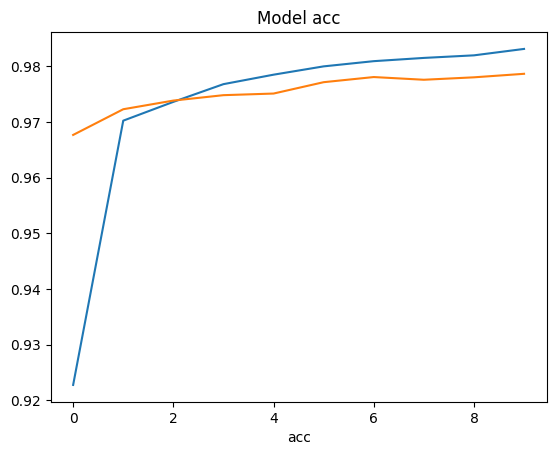

In [22]:
# 여기에 답안코드를 작성하세요.

import matplotlib.pyplot as plt

plt.figure()

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')

plt.title("Model acc")
plt.xlabel("Epochs")
plt.xlabel("acc")

plt.show()